In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score


In [2]:
customers=pd.read_csv(r"C:\Users\MY\Downloads\Customers.csv")
products=pd.read_csv(r"C:\Users\MY\Downloads\Products.csv")
transaction=pd.read_csv(r"C:\Users\MY\Downloads\Transactions.csv")

In [4]:
# Merge the three tables
merged_data = transaction.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

# Preprocess data for clustering
customer_features = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",   # Total spending
    "Quantity": "sum",     # Total quantity purchased
    "Price_y": "mean"         # Average price of purchased products
}).reset_index()

In [5]:

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop("CustomerID", axis=1))

In [6]:
# Apply KMeans Clustering
n_clusters = 4  # You can adjust the number of clusters between 2 and 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)

c:\Users\MY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [7]:
# Assign cluster labels
customer_features["Cluster"] = kmeans.labels_

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 0.91


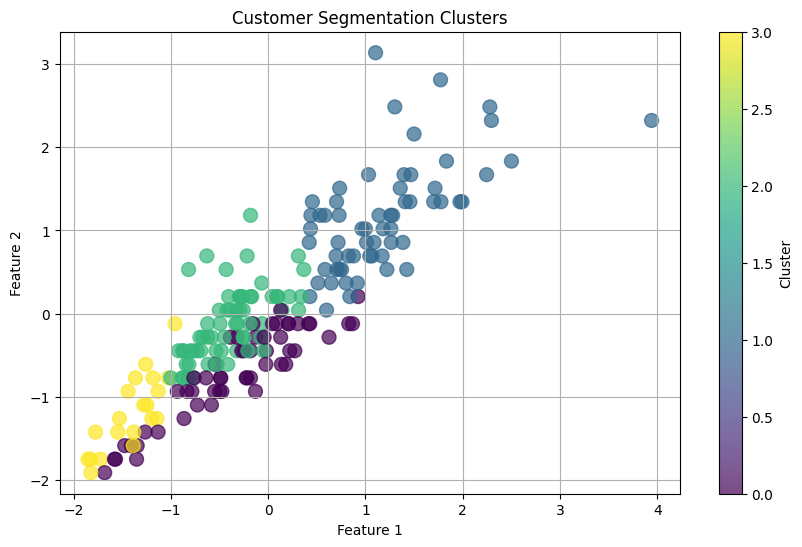

In [8]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap="viridis", s=100, alpha=0.7)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()




In [9]:
# Display clustering results
print(customer_features.head())

# Save results
customer_features.to_csv("Customer_Clusters.csv", index=False)

  CustomerID  TotalValue  Quantity     Price_y  Cluster
0      C0001     3354.52        12  278.334000        2
1      C0002     1862.74        10  208.920000        2
2      C0003     2725.38        14  195.707500        2
3      C0004     5354.88        23  240.636250        1
4      C0005     2034.24         7  291.603333        0
